In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
import warnings
from sklearn.metrics import confusion_matrix
#suppress warnings
warnings.filterwarnings('ignore')

In [2]:
%pwd
%cd "E:\\Universidad\\2023-1\\INTELIGENCIA ARTIFICIAL\\Documents\\Taller 1"
%pwd

E:\Universidad\2023-1\INTELIGENCIA ARTIFICIAL\Documents\Taller 1


'E:\\Universidad\\2023-1\\INTELIGENCIA ARTIFICIAL\\Documents\\Taller 1'

**Clasificación con regresión logística (2,5 puntos)**

*1.*

In [3]:
#Almacenamiento de los datos en un matriz "data"
data = np.loadtxt("datos3.txt",delimiter=',',skiprows=0,usecols=[0,1,2],dtype='float')

#Separación de las variables.

#Número total de datos de entrenamiento.
dataSize = data.shape



In [4]:
# Cálculo del promedio y la desviación estándar, se crea un vector para cada uno y se almacena la información en filas.

prom = []
desv = []
dataN = []
numItera = dataSize[0]

prom.append(np.sum(data[:,0])/dataSize[0])
prom.append(np.sum(data[:,1])/dataSize[0])
print (prom)

desv.append(np.std(data[:,0]))
desv.append(np.std(data[:,1]))
print (desv)

[65.64427405732314, 66.22199808811695]
[19.360686712476134, 18.48963567058878]


In [5]:
# Aplicación de la fórmula para normalización de los datos, calculado en cada columna del array dataN.
dataN = np.zeros((dataSize[0],2))
for x in range(dataSize[0]):
  dataN[x, 0] = (data[x, 0]-prom[0])/desv[0]


for x in range(dataSize[0]):
  dataN[x, 1] = (data[x, 1] - prom[1]) / desv[1]

y = data[:,2]
x1 = dataN[:,0]
x2 = dataN[:,1]

#Cantidad de datos en y que no son ceros.
print(np.count_nonzero(y))
print(len(data))


60
100


*2.*

In [6]:
# Segregación de los datos en 2 grupos, valores de X1 y X2 con Y igual a cero y valores de X1 y X2 con Y igual a uno.
dataX1Y0 = np.zeros((100-np.count_nonzero(y),2))
dataX1Y1 = np.zeros((np.count_nonzero(y),2))
dataX2Y0 = np.zeros((100-np.count_nonzero(y),2))
dataX2Y1 = np.zeros((np.count_nonzero(y),2))
contador0 = 0
contador1 = 0
for x in range(dataSize[0]):
  if y[x] == 0:
    dataX1Y0[contador0,0] = x1[x]
    dataX1Y0[contador0,1] = y[x]
    dataX2Y0[contador0,0] = x2[x]
    dataX2Y0[contador0,1] = y[x]
    contador0 = contador0 + 1
  else:
    dataX1Y1[contador1,0] = x1[x]
    dataX1Y1[contador1,1] = y[x]
    dataX2Y1[contador1,0] = x2[x]
    dataX2Y1[contador1,1] = y[x]
    contador1 = contador1 + 1


#print(dataX2Y0.shape)


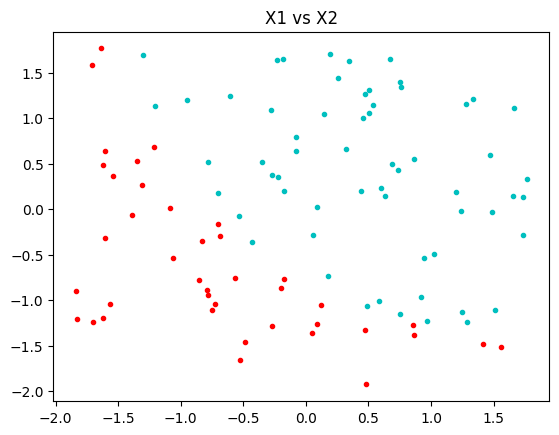

In [7]:
plt.plot(dataX1Y0[:,0],dataX2Y0[:,0],'.r')
plt.plot(dataX1Y1[:,0],dataX2Y1[:,0],'.c')
plt.title("X1 vs X2")
plt.show()

**3.**

In [8]:
# Llama al np y usa la función zeros para crear el vector Beta con dimensión 3,1 y lo llena de ceros.
Beta = np.zeros((3,1))
# Llama al np y usa la función ones para crear el vector (puros unos) con tamaño en la cantidad de filas que tiene dataSize[0] y lo llena de unos.
onesVector = np.ones((dataSize[0],))

# Se crea la  matriz X que tiene concatenación de el OnesVector con el vector de data en la posición 0. Resultando la matriz que vimos.
X = np.column_stack((onesVector,dataN[:,0],dataN[:,1]))

# Creo una matriz y que tiene 97 ceros en la primera columna con el dataSize
y2=np.zeros((dataSize[0],1))

# Se tomó la colunma de Y en los datos de entranamiento y se llevó a una variable llamada Y.
y2[:,0] = data[:,2]
#print(y)
alpha = 0.01
numIter = 5500
m = dataSize[0]


In [9]:
# reshape se usa para crear el tamañano de la matriz.
temp1 = (np.reshape(X[:,0],(m,1)))
# Realiza el proceso de multiplicación de las matrices de filas por columnas.
h_beta = np.dot(X,Beta)

# np.subtract(h_beta,y) hace la resta uno a uno entre las matrices h_beta(matriz de hipetesis 97 en total) y el vector y, de 97 en total. temp1 luego se multiplica 1 a 1 con la matriz resultante de la resta anterior y el valor restante, será temp3. Multiply es la de producto punto.
temp3 = np. multiply(temp1,(np.subtract(h_beta,y)))
# temp2 es el resultado de la suma de todo el temp3 y es un escalar.
temp2 = np.sum(temp3)
# temp2 se multiplica por la división de alpha(0.01) y m, esto es temp4.
temp4 = temp2*(alpha/m)



*4.*

In [10]:
# pasamos todos los vectores y datos requeridos como parámetros.
def Gradiente(Beta,alpha,m,X,y,numIter,Z):
  betaTemp = np.zeros((3,1))
  h_beta = np.zeros((m,1))  
  
# Ciclo para iterar hasta 500, en python todo arranca desde 0 e iría hasta 499.
  for i in range(numIter): 
    # j arranca en cero y va hasta 1. Es una posición exclusiva. 
    for j in range(3):
      # Z es igual a BX.
      Z = np.dot(X,Beta)
      #Función de hipotésis.
      h_beta = 1 / (1 + math.e**(-Z))
      
      # Cuando la J vale 0, hace el caso B0 y multiplica por la columna de unos, cuando J vale 2, multiplica por la columna de X. 
      temp1 = (np.reshape(X[:,j],(m,1)))
      # internamente se resta la hipótesis - y, luego se multiplica 1 a 1 (multiply) y finalmente se suma y queda un escalar.
      temp2 = np.sum(np. multiply(temp1,(np.subtract(h_beta,y2))))
      # Es un escalar que se almacena en betatemp, primero se divide alpha entre m, se multiplica por temp2 y se resta de Beta, si j es 0, resta de Beta 0 y si es 1, resta Beta 1. 
      betaTemp[j,0] = (Beta[j,0] - (temp2*(alpha/m))) + ((1/m)*Beta[j,0])
    Beta = betaTemp
  return (Beta, h_beta, Z)


In [11]:
alpha = 0.01
numIter = 5500
Beta = np.zeros((3,1))
Z = np.zeros((dataSize[0],1))
line = np.zeros((dataSize[0],1))
Beta, h_beta, Z = Gradiente(Beta,alpha,m,X,y,numIter,Z)
contador3 = 0

#print(h_beta)

*5*

In [12]:
#Calculo de la recta que separa los valores.
for x in range(m):
 line[x] = (-Beta[0]-(Beta[2]*dataN[x,1]))/Beta[1]
 contador3 = contador3 + 1


In [13]:
#Calculo de la matriz de confusión.
FP = 0 # Falsos Positivos (FP)
FN = 0 # Falsos Negativos (FN)
TP = 0 # Verdaderos Positivos (TP)
TN = 0 # Verdaderos Negativos (TN)

for x in range(m):
    if (y[x] == 0 and h_beta[x] == 0):
        TN = TN + 1
    elif(y[x] == 1 and h_beta[x] == 1):
        TP = TP + 1
    elif(y[x] == 0 and h_beta[x] == 1):
        FN = FN + 1
    else:
        FP = FP + 1


*5.*

Total Verdaderos Positivos:  55
Total Verdaderos Negativos:  35
Total Falsos Positivos:  5
Total Falsos Negativos:  5


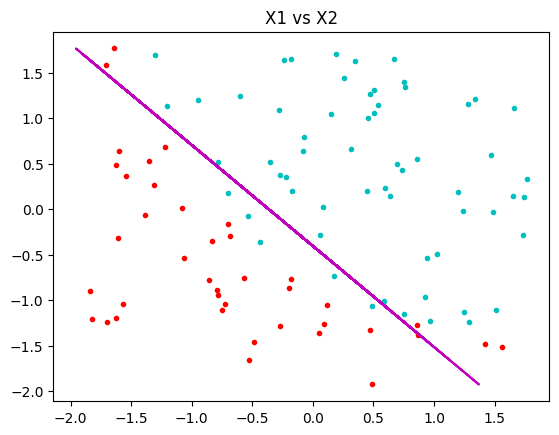

In [14]:
#Dibujo de la recta que separa los valores.
print("Total Verdaderos Positivos: ",TP)
print("Total Verdaderos Negativos: ",TN)
print("Total Falsos Positivos: ",FP)
print("Total Falsos Negativos: ",FN)

plt.plot(dataX1Y0[:,0],dataX2Y0[:,0],'.r')
plt.plot(dataX1Y1[:,0],dataX2Y1[:,0],'.c')
plt.plot(line[:],dataN[:,1],'-m')
plt.title("X1 vs X2")
plt.show()

**III. Evaluación del desempeño de la clasificación con regresión logística**

In [16]:
# Precisión y Recall

P = TP / (TP + FP) # Proporción de los clasificados como positivos, reales.
R = TP / (TP + FN) # Proporción de todos los positivos,  clasificados como tal.
FPR = FP / (TN + FP) # Proporción de todos los negativos, clasificados como positivos
# Errores de clasificación
E = (FP + FN) / (TP + TN + FP + FN)
#Accuracy
A = 1 - E


print("Proporción de los clasificados como positivos reales: ",P)    
print("Proporción de todos los positivos,  clasificados como tal: ",R)    
print("Proporción de todos los negativos, clasificados como positivos:",FPR) 
print("Error de clasificación:",E) 
print("Accuracy (Exactitud):",A) 


Proporción de los clasificados como positivos reales:  0.9166666666666666
Proporción de todos los positivos,  clasificados como tal:  0.9166666666666666
Proporción de todos los negativos, clasificados como positivos: 0.125
Error de clasificación: 0.1
Accuracy (Exactitud): 0.9


**IV. Tipos de Aprendizaje de máquina**

El aprendizaje supervisado se diferencia del No supervisado, ya que consiste en que partimos de un conjunto de datos etiquetado previamente y en el cual conocemos el valor del atributo objetivo para el conjunto de datos que disponemos.  El aprendizaje No supervisado parte de datos no etiquetados o no procesados previamente.

Diferencias:

El aprendizaje automático supervisado generalmente se usa para clasificar datos o hacer predicciones, mientras que el aprendizaje no supervisado generalmente se usa para comprender las relaciones dentro de los conjuntos de datos.